# Heart Disease Project 

## what we are going to cover is -
###              1 .Problem Definition
###              2 .Data 
###              3.Evaluation
###              4.Features
###              5.Modelling
###              6.Experimentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sb

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , recall_score
from sklearn.metrics import precision_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve , RocCurveDisplay 
# we need to check RocCurveDisplay as we have used first one already

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

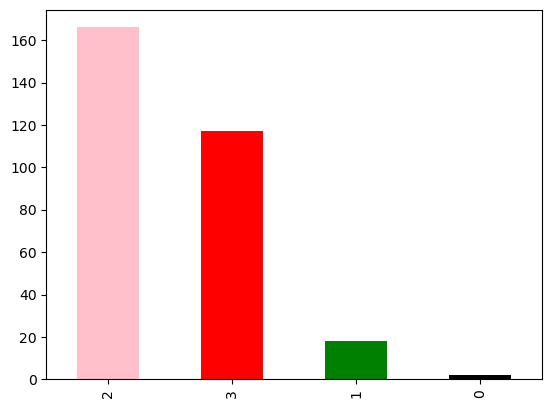

In [6]:
heart_disease["thal"].value_counts().plot(kind="bar",color=["pink","red","green","black"])

In [23]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
heart_disease["sex"].value_counts() #showing 69 womens and 207 mens

1    207
0     96
Name: sex, dtype: int64

In [30]:
pd.crosstab(heart_disease["sex"],heart_disease["target"])

target,0,1
sex,,
0,24,72
1,114,93


### using cross tab to see how many womens and men are having heart disease as we can see -
### - out of 96 women 72 have disease and out of 207 men 93 have disease

Text(0, 0.5, 'numbers of counts')

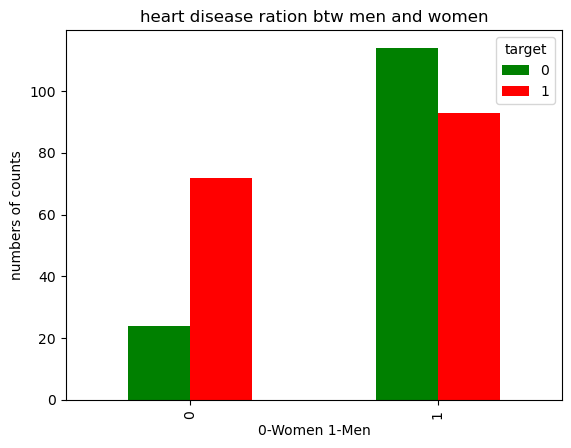

In [57]:
pd.crosstab(heart_disease["sex"],heart_disease["target"]).plot(kind="bar",color=["green","red"])
mpl.title("heart disease ration btw men and women")
mpl.xlabel("0-Women 1-Men")
mpl.ylabel("numbers of counts")


Text(0, 0.5, 'cholestrol-->')

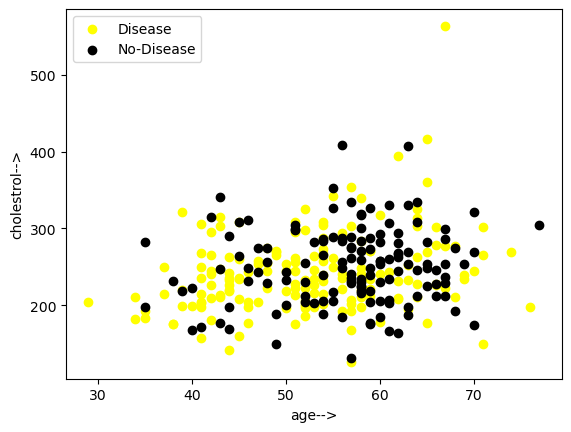

In [66]:
mpl.scatter(heart_disease.age[heart_disease.target==1],heart_disease.chol[heart_disease.target==1],color="yellow")
mpl.scatter(heart_disease.age[heart_disease.target==0],heart_disease.chol[heart_disease.target==0],color="black")
mpl.legend(["Disease","No-Disease"])
mpl.xlabel("age-->")
mpl.ylabel("cholestrol-->")

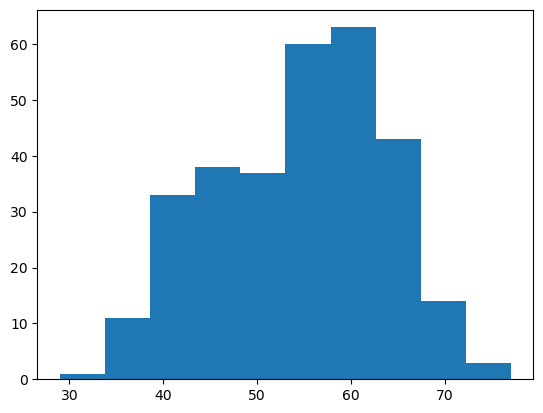

In [72]:
mpl.hist(heart_disease.age);
#heart_disease.chol.plot().hist()

In [73]:
heart_disease.fbs.value_counts() #heart_disease["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

Text(0, 0.5, 'numbers')

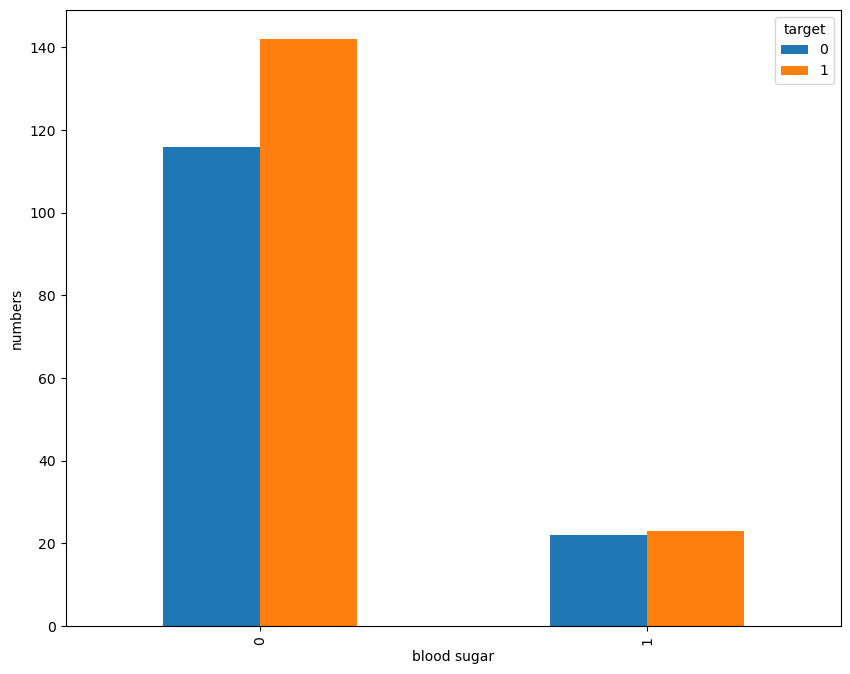

In [87]:
pd.crosstab(heart_disease.fbs,heart_disease.target).plot(kind="bar",figsize=(10,8))
mpl.xlabel("blood sugar")
mpl.ylabel("numbers")

## making a corelation matrix btw dependant and independant variables


In [90]:
corelation=heart_disease.corr()
corelation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


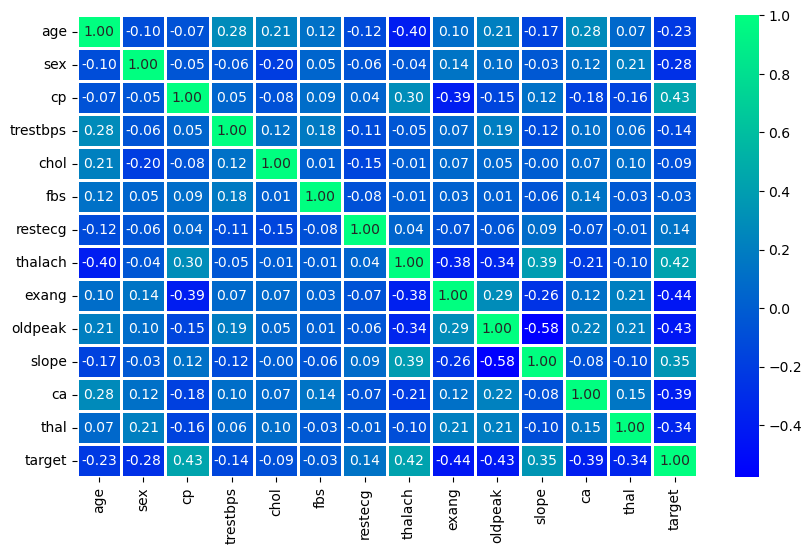

In [98]:
fig,ax = mpl.subplots(figsize=(10,6))
ax = sb.heatmap(corelation,annot=True,linewidths=0.75,fmt=".2f",cmap="winter")

## using corelation matirx and representing it with seaborn heatmap

In [99]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
pd.crosstab(heart_disease.restecg[heart_disease.target==1],heart_disease.age[heart_disease.target==1])


age,29,34,35,37,38,39,40,41,42,43,...,64,65,66,67,68,69,70,71,74,76
restecg,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,1,0,3,2,0,...,2,2,3,1,1,1,1,1,1,0
1,0,1,2,2,2,2,1,6,5,5,...,4,2,1,2,1,1,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

## we are going to try three different models
### 1.Logistic Regression
### 2.k-nearest-classification
### 3.RandomForestClassifier

In [168]:
models = {"Logistic_regs":LogisticRegression(),"k_neighbour":KNeighborsClassifier,"randomForest":RandomForestClassifier()}
models.items()

dict_items([('Logistic_regs', LogisticRegression()), ('k_neighbour', <class 'sklearn.neighbors._classification.KNeighborsClassifier'>), ('randomForest', RandomForestClassifier())])

In [169]:


def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
   
    model_score = {}
    for name,model in models.items():
        clf.fit(x_train,y_train)
        model_score[name] = clf.score(x_test,y_test)
    
    return model_score
        
    

In [170]:
scores = fit_and_score(models,x_train,x_test,y_train,y_test)
scores

AttributeError: 'list' object has no attribute 'fit'

In [19]:
clf = KNeighborsClassifier()

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [21]:
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [175]:
clf.score(x_train,y_train)

0.7688679245283019

In [15]:
clf2 = LogisticRegression(max_iter=200)

In [22]:
clf2.fit(x_train,y_train)

C:\Users\pk037\Onedrive\Anaconda\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [186]:
clf2.score(x_test,y_test)

0.8131868131868132

In [182]:
clf3 = RandomForestClassifier()

In [183]:
clf3.fit(x_train,y_train)

RandomForestClassifier()

In [185]:
clf3.score(x_test,y_test)

0.8241758241758241

### using KNearestneighbours classification

In [198]:
clf_k = KNeighborsClassifier()

n_neighbours = range(1,20)


test_score = []
train_Score = []


for i in n_neighbours:
    clf_k.set_params(n_neighbors=i)
    clf_k.fit(x_train,y_train)
    
    train_Score.append(clf_k.score(x_train,y_train))
    test_score.append(clf_k.score(x_test,y_test))

In [199]:
test_score

[0.5934065934065934,
 0.6153846153846154,
 0.6263736263736264,
 0.6373626373626373,
 0.6593406593406593,
 0.6483516483516484,
 0.6703296703296703,
 0.6593406593406593,
 0.6593406593406593,
 0.6923076923076923,
 0.6703296703296703,
 0.6593406593406593,
 0.6703296703296703,
 0.6153846153846154,
 0.6483516483516484,
 0.6593406593406593,
 0.6813186813186813,
 0.6703296703296703,
 0.6703296703296703]

In [200]:
train_Score

[1.0,
 0.7877358490566038,
 0.7783018867924528,
 0.7547169811320755,
 0.7688679245283019,
 0.7594339622641509,
 0.7452830188679245,
 0.7216981132075472,
 0.7216981132075472,
 0.6933962264150944,
 0.7075471698113207,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6745283018867925,
 0.6981132075471698]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


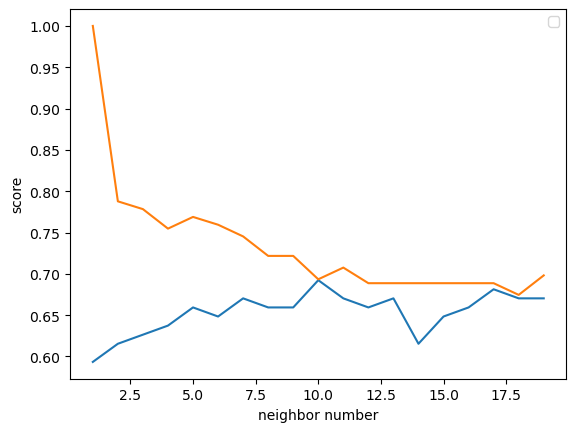

In [206]:
mpl.plot(n_neighbours,test_score)
mpl.plot(n_neighbours,train_Score)
mpl.xlabel("neighbor number")
mpl.ylabel("score")
mpl.legend()

In [8]:
np.logspace(4,-4,10)

array([1.00000000e+04, 1.29154967e+03, 1.66810054e+02, 2.15443469e+01,
       2.78255940e+00, 3.59381366e-01, 4.64158883e-02, 5.99484250e-03,
       7.74263683e-04, 1.00000000e-04])

In [14]:
np.arange(1,20,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [24]:
y_preds = clf2.predict(x_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
tpr,fpr,thresholds = roc_curve(y_test,y_preds)


In [44]:
auc_score = roc_auc_score(y_test,y_preds)
auc_score

0.8537234042553191

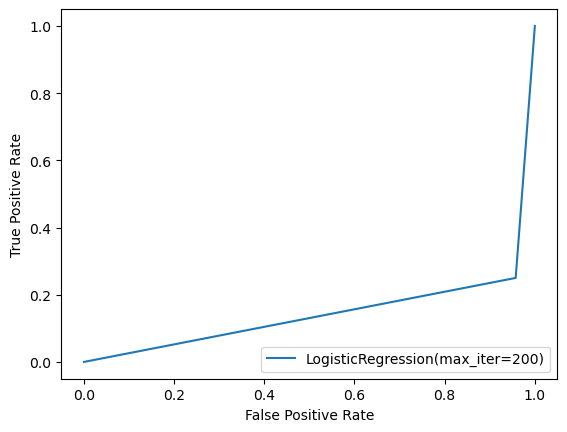

In [34]:
d=RocCurveDisplay(tpr=tpr,fpr=fpr,estimator_name=clf2)
d.plot()


In [35]:
confusion_matrix(y_test,y_preds)

array([[33, 11],
       [ 2, 45]], dtype=int64)

In [36]:
sb

<module 'seaborn' from 'C:\\Users\\pk037\\Onedrive\\Anaconda\\heart_disease_project\\env\\Lib\\site-packages\\seaborn\\__init__.py'>

Text(41.25, 0.5, 'our model predicted')

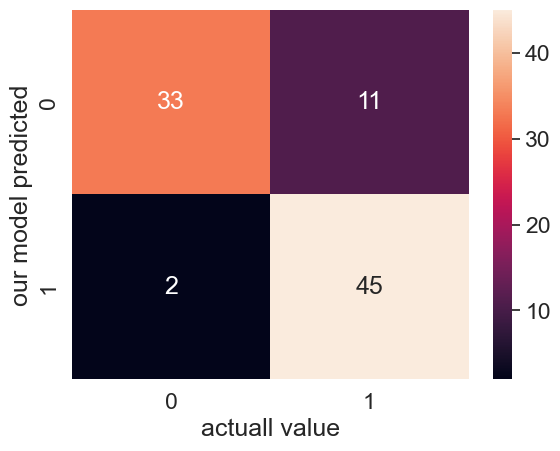

In [46]:
confu_matrix = confusion_matrix(y_test,y_preds)
sb.set(font_scale=1.5)
sb.heatmap(confu_matrix,annot=True)
mpl.xlabel("actuall value")
mpl.ylabel("our model predicted")

### by watching this confusion matrix we can say that our model is predicting 11 peoples as no disease but actually they have disease, and it is alos saying 2 peoples have disease but actually they don't have 

# Note-

## if our model predictions are all correct(`acc=1.0) then in top right box value should be 1`-
## - and in `bottom left box value should be 0`

In [56]:
clf2.coef_

#coef_means how much our each independant variable is contributing to predict the acutal value of dependant vriable
#to add this with columns write
comp = dict(zip(heart_disease.columns,list(clf2.coef_[0])))
comp
#NOTE - WE ALOS SIMPLY USE coef_ attribute to get result without using this zip function

{'age': 0.018726357939757025,
 'sex': -1.2989336080748142,
 'cp': 0.7886068926215459,
 'trestbps': -0.017774973768843204,
 'chol': -0.002612603614924804,
 'fbs': 0.23431990834974914,
 'restecg': 0.4055845606979869,
 'thalach': 0.02762345255992794,
 'exang': -0.6314922054117234,
 'oldpeak': -0.39796524591408683,
 'slope': 0.4913666225216247,
 'ca': -0.6848094137424446,
 'thal': -0.8195484821942353}

In [48]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
heart_disease.head()

NameError: name 'heart_disease' is not defined

In [5]:
a = [1,5,4]
b=["one","two","three"]

z= zip(a,b)
print(list(z))

[(1, 'one'), (5, 'two'), (4, 'three')]


In [5]:
clf = LogisticRegression()

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [6]:
grid = {"penalty":['l1', 'l2', 'elasticnet'],"solver":['newton-cg', 'sag',  'lbfgs' ],"C":np.logspace(-2,4,30)}

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
random_cv = RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=True)

In [11]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\pk037\Onedrive\Anaconda\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pk037\Onedrive\Anaconda\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-02, 1.61026203e-02, 2.59294380e-02, 4.17531894e-02,
       6.72335754e-02, 1.08263673e-01, 1.74332882e-01, 2.80721620e-01,
       4.52035366e-01, 7.27895384e-01, 1.17210230e+00, 1.88739182e+00,
       3.03919538e+00, 4.89390092e+00, 7.88046282e+00, 1.26896100e+01,
       2.04335972e+01, 3.29034456e+01, 5.29831691e+01, 8.53167852e+01,
       1.37382380e+02, 2.21221629e+02, 3.56224789e+02, 5.73615251e+02,
       9.23670857e+02, 1.48735211e+03, 2.39502662e+03, 3.85662042e+03,
       6.21016942e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'sag',
                                                   'lbfgs']},
                   verbose=True)

In [12]:
random_cv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 6210.169418915616}

In [13]:
random_cv.score(x_test,y_test)

0.8241758241758241

In [14]:
random_cv.score(x_train,y_train)

0.8443396226415094